<a href="https://colab.research.google.com/github/anujyadav210/wine-quality-prediction/blob/main/model_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/WineQT.csv')
df.head(5)




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#check the dataset structure
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 1143
Number of columns: 13


In [ ]:
#removing unwanted columns
df = df.drop('Id', axis=1)
df.head(5) # To see the updated DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#check the dataset structure
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 1143
Number of columns: 12


In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print(null_counts)

# Check the data types of each column
df.dtypes


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:


# Check for null values, including values that might be represented as 0 or empty strings
for col in df.columns:
  # Check for 0 values, you can adjust the comparison (e.g., < 1, == 0.0)
  zero_counts = (df[col] == 0).sum()
  # Check for null values
  null_counts = df[col].isnull().sum()
  # Check for empty string values (if applicable)
  empty_string_counts = (df[col] == '').sum() if df[col].dtype == 'object' else 0

  print(f"Column '{col}':")
  print(f"- Zero values: {zero_counts}")
  print(f"- Null values: {null_counts}")
  print(f"- Empty string values: {empty_string_counts}")
  print("-" * 20)


Column 'fixed acidity':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'volatile acidity':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'citric acid':
- Zero values: 99
- Null values: 0
- Empty string values: 0
--------------------
Column 'residual sugar':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'chlorides':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'free sulfur dioxide':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'total sulfur dioxide':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'density':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'pH':
- Zero values: 0
- Null values: 0
- Empty string values: 0
--------------------
Column 'sulphates':
- Zero values: 0
- Null values: 0
- Empty string 

In [ ]:
# Calculate the mean of 'citric acid' excluding zeros
mean_citric_acid = df.loc[df['citric acid'] != 0, 'citric acid'].mean()

# Replace zero values in 'citric acid' with the calculated mean
df.loc[df['citric acid'] == 0, 'citric acid'] = mean_citric_acid
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.293812,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.293812,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.293812,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#  to roundoff the values of citric acid column to two decimal places

# Round off 'citric acid' column to two decimal places
df['citric acid'] = df['citric acid'].round(2)
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.29,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.29,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.29,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#  to remove features of the dataset
df = df.drop(['residual sugar', 'total sulfur dioxide','density','pH'], axis=1)
df.head(5) # To see the updated DataFrame

# Get updated number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 1143
Number of columns: 8


In [ ]:
df.head(5)


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.29,0.076,11.0,0.56,9.4,5
1,7.8,0.88,0.29,0.098,25.0,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,0.58,9.8,6
4,7.4,0.70,0.29,0.076,11.0,0.56,9.4,5


In [ ]:
# handle outliers

import numpy as np
# Identify outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply outlier handling to specific columns
for col in ['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']:
  df = handle_outliers(df, col)

df.head(5)


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.29,0.076,11.0,0.56,9.4,5
1,7.8,0.88,0.29,0.098,25.0,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,0.58,9.8,6
4,7.4,0.70,0.29,0.076,11.0,0.56,9.4,5


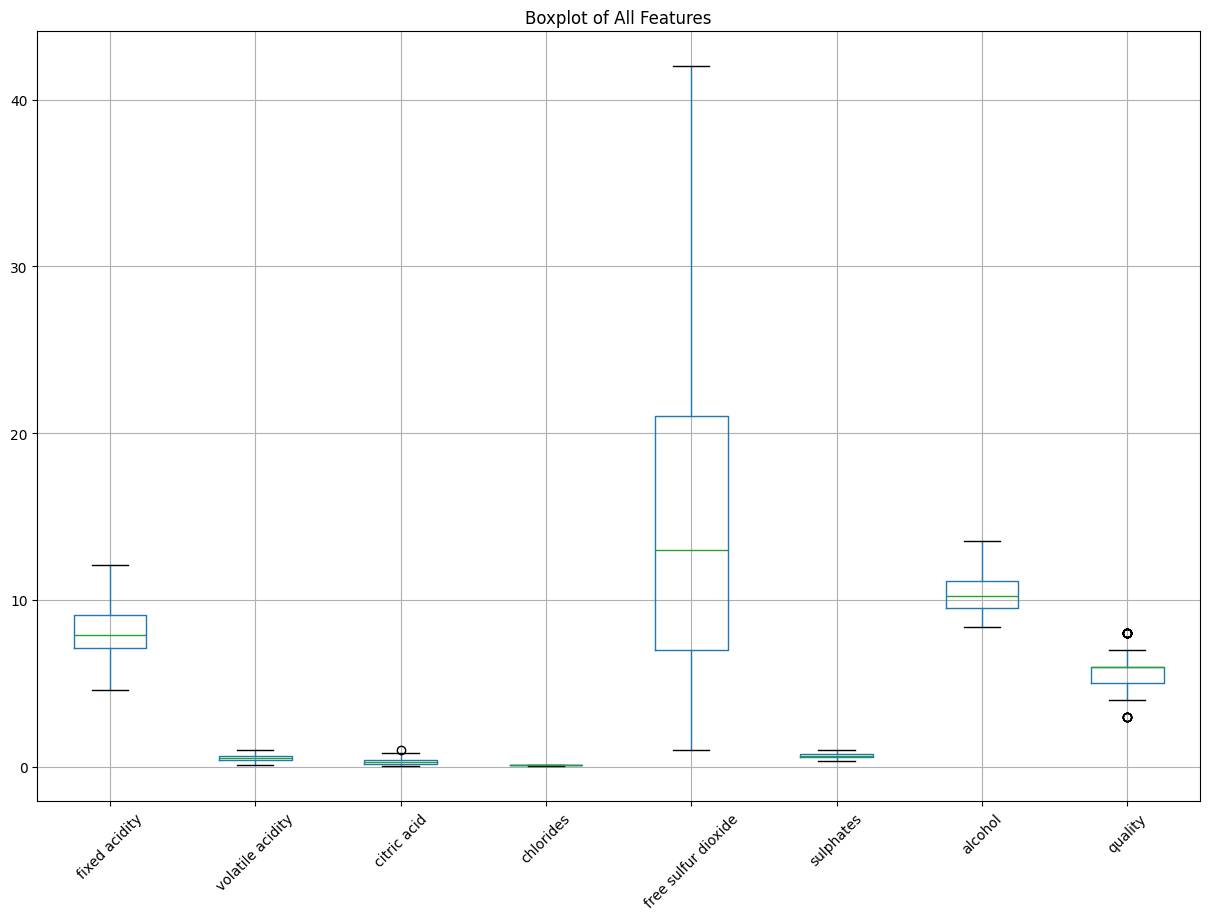

In [ ]:
#  draw boxplot of all the features

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of All Features')
plt.show()


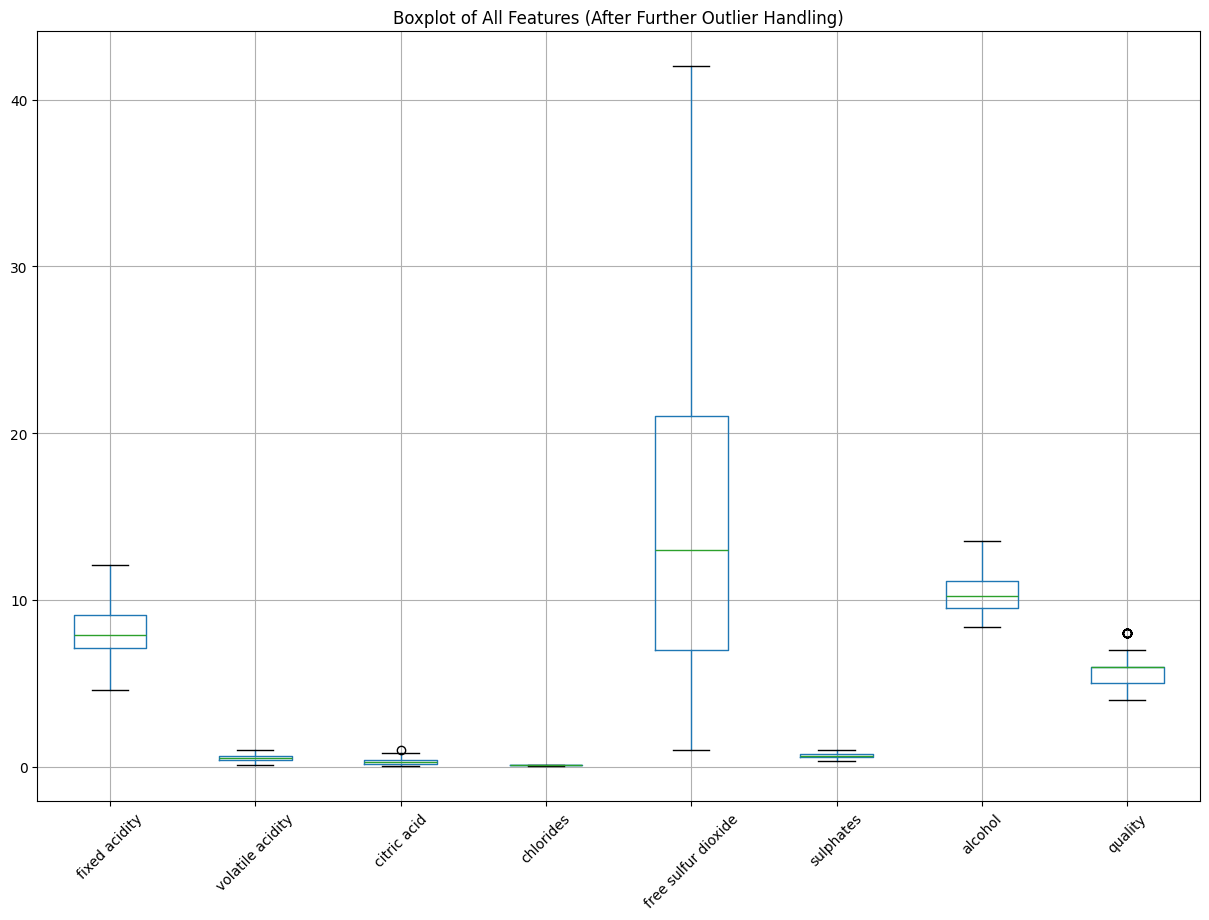

In [ ]:
# outliers handling

import matplotlib.pyplot as plt
import numpy as np


from scipy import stats

def handle_outliers_zscore(df, column, threshold=3):
    z = np.abs(stats.zscore(df[column]))
    df[column] = np.where(z > threshold, np.median(df[column]), df[column])  # Replace with median
    return df


# Apply the Z-score method to the 'alcohol' column (or other columns with apparent outliers)
df = handle_outliers_zscore(df, 'quality')



# Verify the effect of the outlier handling
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of All Features (After Further Outlier Handling)')
plt.show()


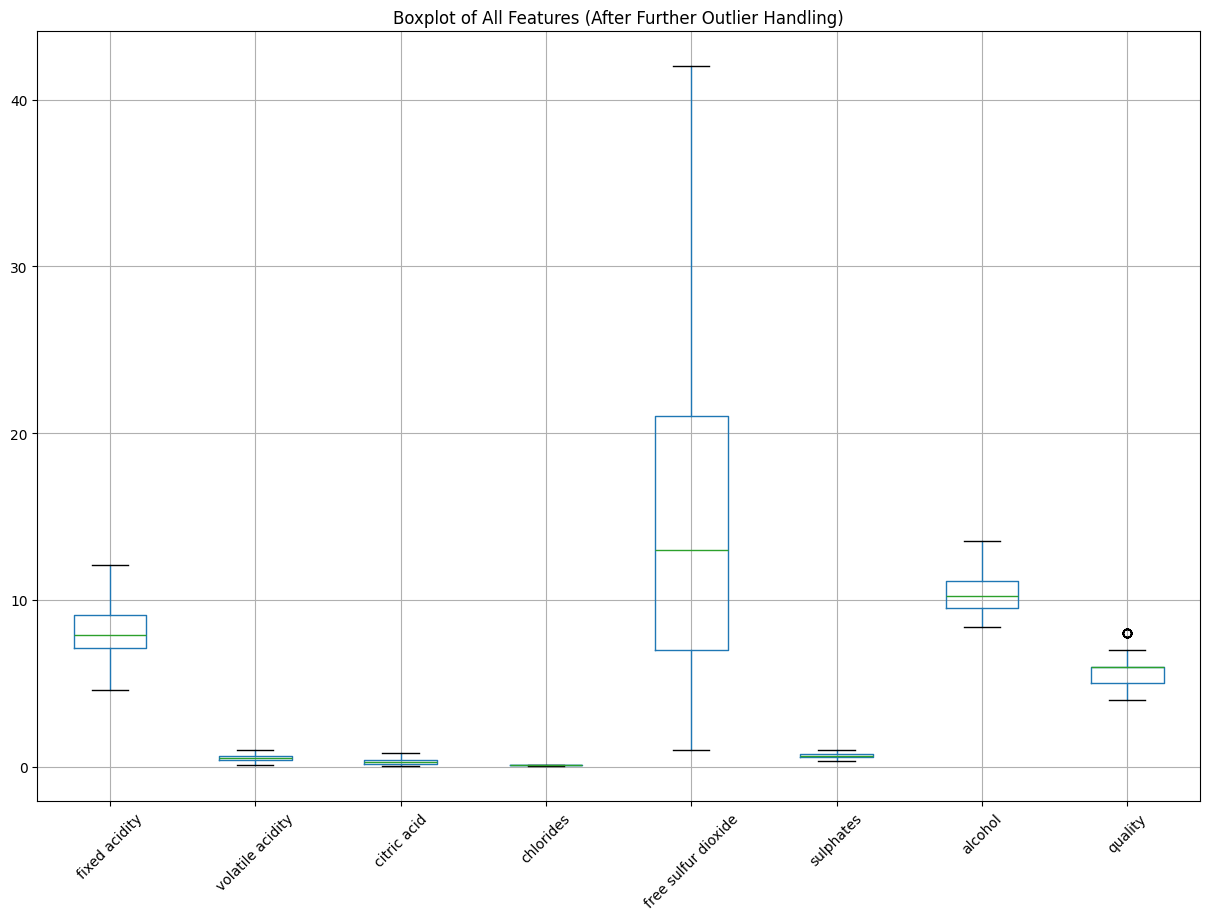

In [ ]:
df = handle_outliers_zscore(df, 'citric acid')
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of All Features (After Further Outlier Handling)')
plt.show()

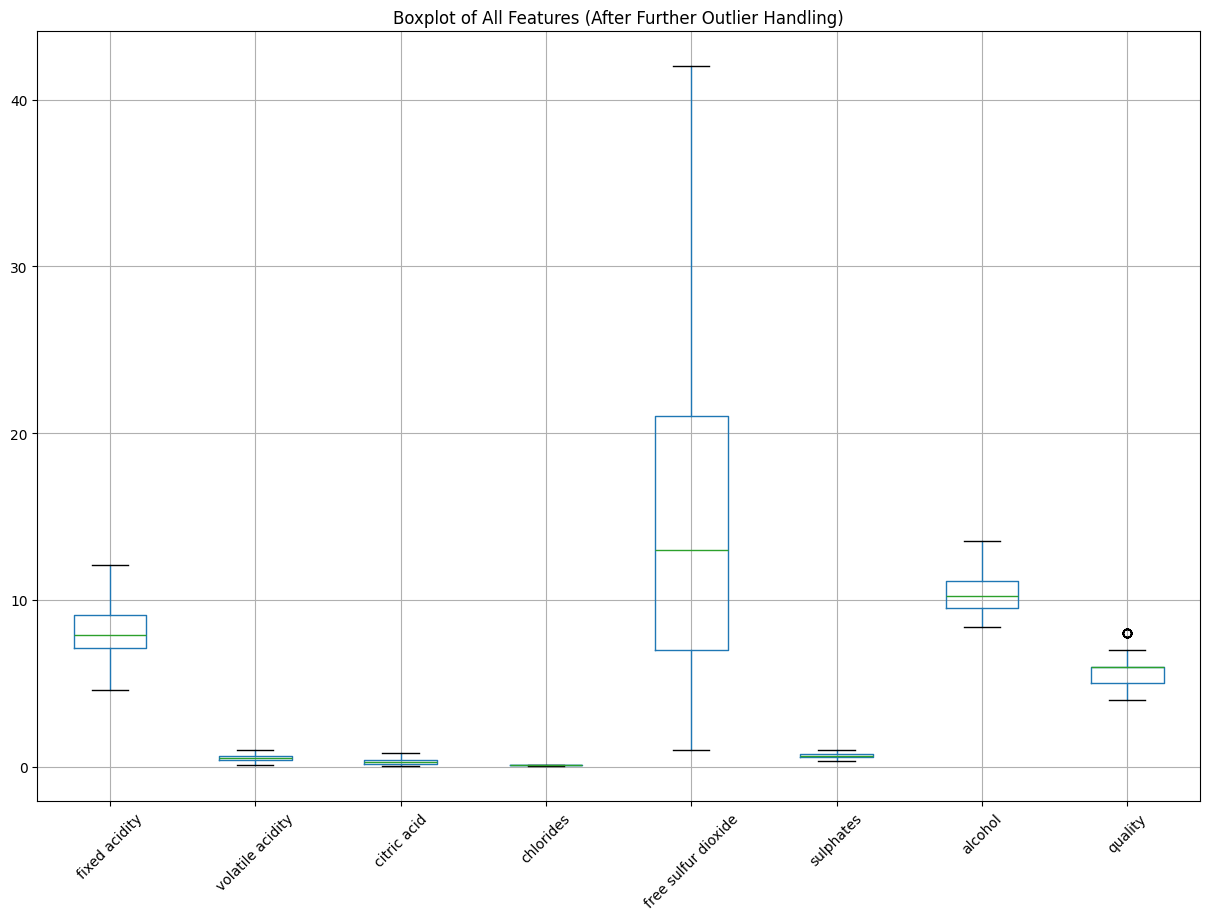

In [ ]:
df = handle_outliers_zscore(df, 'quality')
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of All Features (After Further Outlier Handling)')
plt.show()

In [ ]:
df.tail(20)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,sulphates,alcohol,quality
1123,6.4,0.380,0.14,0.040,15.0,0.65,11.1,6.0
1124,7.3,0.690,0.32,0.069,35.0,0.51,9.5,5.0
1125,6.0,0.580,0.20,0.075,15.0,0.67,12.5,6.0
1126,7.5,0.520,0.40,0.060,12.0,0.64,11.8,6.0
1127,8.0,0.300,0.63,0.081,16.0,0.78,10.8,6.0
1128,6.2,0.700,0.15,0.076,13.0,0.60,11.9,6.0
1129,6.8,0.670,0.15,0.118,13.0,0.67,11.3,6.0
1130,7.4,0.350,0.33,0.068,9.0,0.60,11.9,6.0
1131,6.1,0.715,0.10,0.053,13.0,0.50,11.9,5.0
1132,6.2,0.460,0.29,0.074,32.0,0.62,9.8,5.0


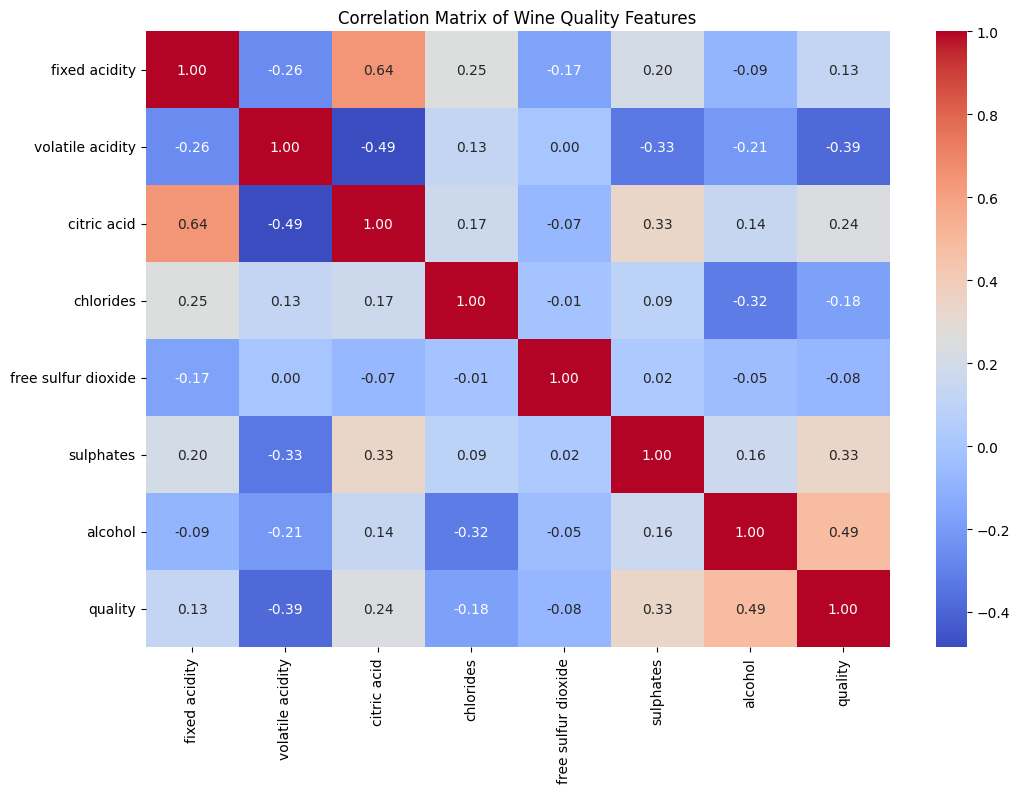

In [ ]:
# correlation matrix of the above dataset

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Quality Features')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1143)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

# Save the best model (example: Gradient Boosting)
best_model =RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)
joblib.dump(best_model, "best_wine_quality_model.pkl")

#download the model
from google.colab import files
files.download("best_wine_quality_model.pkl")



Random Forest Accuracy: 0.67
Gradient Boosting Accuracy: 0.66
SVM Accuracy: 0.61
KNN Accuracy: 0.56


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>